In [17]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")
import logging

import seaborn as sns

from xlstm_scaling_laws.analysis.isoflop.plot.ctx_isocurve import (
    get_isoflop_ctx_powerlaw_plot,
)
from xlstm_scaling_laws.analysis.isoflop.plot.ctx_powerlaw import (
    create_ctx_powerlaw_plot,
)
from xlstm_scaling_laws.common.plot.plot_config import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
logging.basicConfig(level=logging.FATAL, format="%(levelname)s: %(message)s")

# Context length powerlaw fits

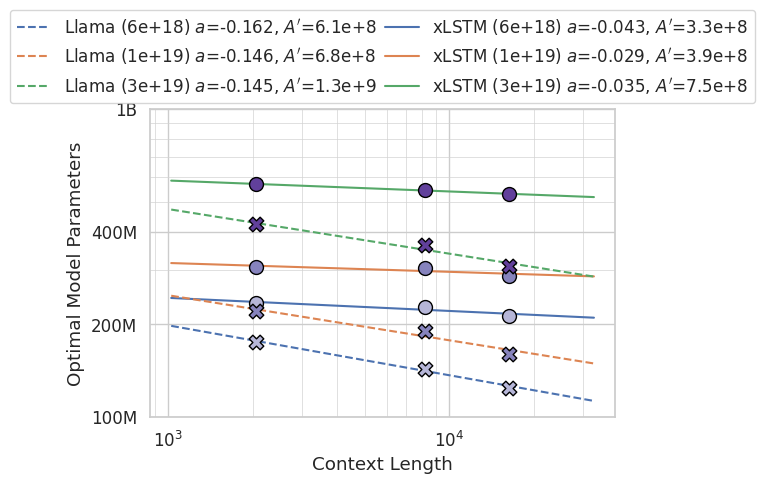

In [19]:
with sns.plotting_context("notebook", font_scale=1.1):
    with sns.axes_style(
        "whitegrid",
        rc={
            # "xtick.bottom": True,
            # "ytick.left": True,
            # "xtick.color": "lightgrey",
            # "ytick.color": "lightgrey",
        },
    ):
        ax = create_ctx_powerlaw_plot(
            plot_type="num_params",
            legend_kwargs={
                "ncols": 2,
                "columnspacing": 0.5,
                "loc": "upper center",
                "bbox_to_anchor": (0.5, 1.35),  # Adjust the vertical position as needed
            },
            x_col="context_length",
            flop_range_for_powerlaw_fit=[1024, 32768],
            flop_range_for_powerlaw_plot=[1024, 32768],
            yticks=[1e8, 2e8, 4e8, 1e9],
            ytick_labels=["100M", "200M", "400M", "1B"],
            legend_order=[
                "Llama (6",
                "Llama (1",
                "Llama (3",
                "xLSTM (6",
                "xLSTM (1",
                "xLSTM (3",
            ],
        )

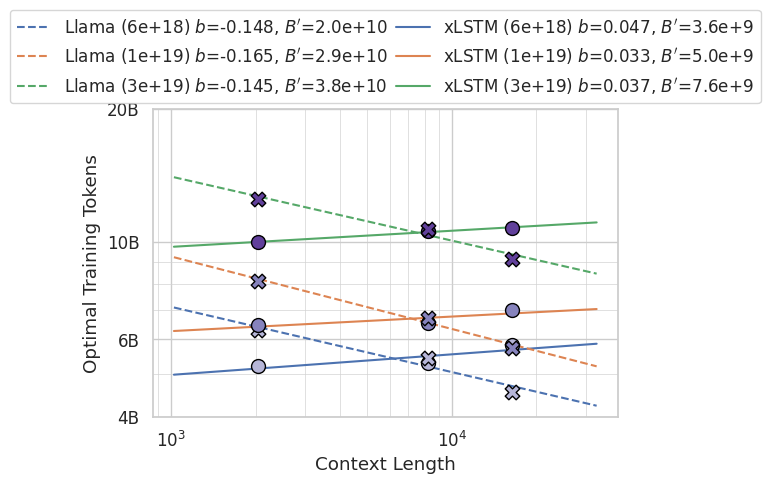

In [20]:
with sns.plotting_context("notebook", font_scale=1.1):
    with sns.axes_style(
        "whitegrid",
        rc={
            # "xtick.bottom": True,
            # "ytick.left": True,
            # "xtick.color": "lightgrey",
            # "ytick.color": "lightgrey",
        },
    ):
        ax = create_ctx_powerlaw_plot(
            plot_type="num_tokens_training",
            legend_kwargs={
                "ncols": 2,
                "columnspacing": 0.5,
                "loc": "upper center",
                "bbox_to_anchor": (0.5, 1.35),  # Adjust the vertical position as needed
            },
            yticks=[4e9, 6e9, 1e10, 2e10],
            x_col="context_length",
            flop_range_for_powerlaw_fit=[1024, 32768],
            flop_range_for_powerlaw_plot=[1024, 32768],
            ytick_labels=["4B", "6B", "10B", "20B"],
            legend_order=[
                "Llama (6",
                "Llama (1",
                "Llama (3",
                "xLSTM (6",
                "xLSTM (1",
                "xLSTM (3",
            ],
        )

# Combined isocurve and powerlaw plot

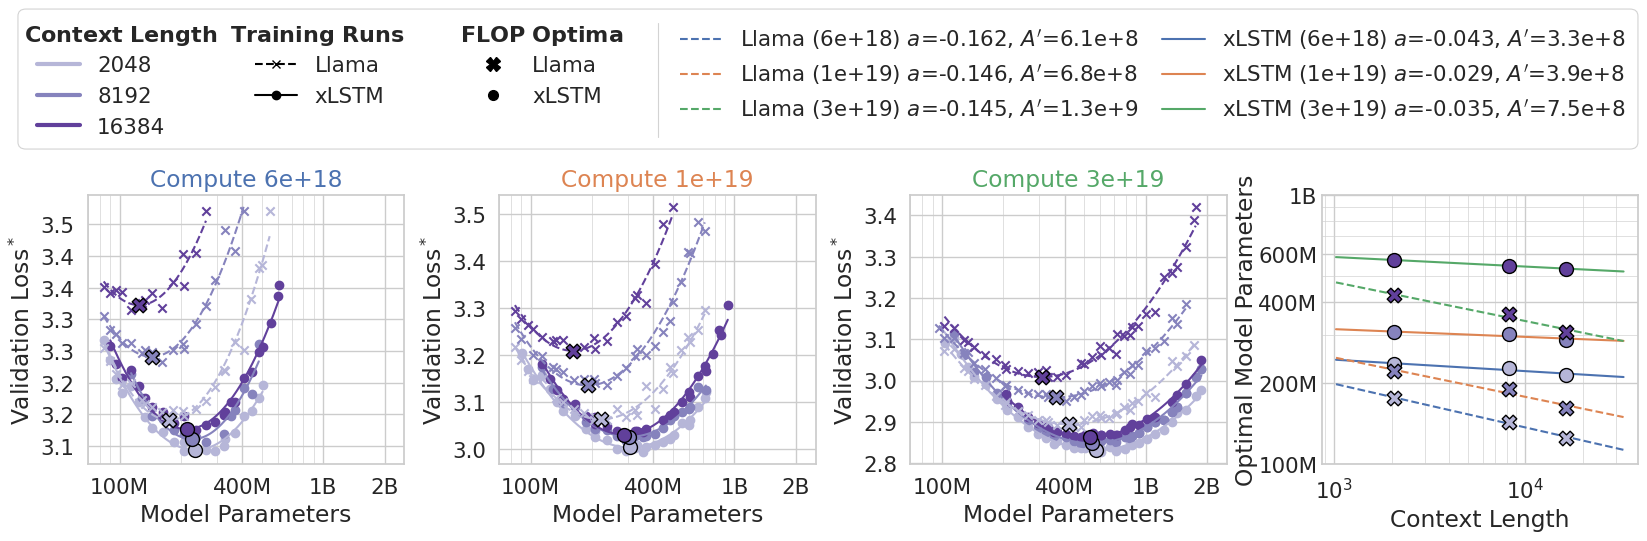

In [21]:
legend_offset = 0.15
frameon = False
with sns.plotting_context("notebook", font_scale=1.4):
    with sns.axes_style(
        "whitegrid",
        rc={
            # "xtick.bottom": True,
            # "ytick.left": True,
            # "xtick.color": "lightgrey",
            # "ytick.color": "lightgrey",
        },
    ):
        fig = get_isoflop_ctx_powerlaw_plot(
            x_col="num_params",
            y_col="val/.dclm_loss",
            figsize=(20, 3.5),
            legend_kwargs={
                "ncols": 3,
                "loc": "lower left",
                "bbox_to_anchor": (0.09, 0.84 + legend_offset),
                "facecolor": "white",
                "frameon": frameon,
            },
            legend_kwargs_powerlaw_plot={
                "ncols": 2,
                "columnspacing": 1.1,
                "loc": "lower left",
                "bbox_to_anchor": (
                    -2.09,
                    1.05 + legend_offset,
                ),  # Adjust the vertical position as needed
                "frameon": frameon,
            },
            gridspec_kw={"wspace": 0.3},
            y_axis_labelpad_powerlaw_plot={
                "num_params": 0.0,
                "num_tokens_training": 0.0,
            },
        )

In [22]:
# colors green and blue!
savefig(fig, "isoflop_ctx_powerlaw_all__params")

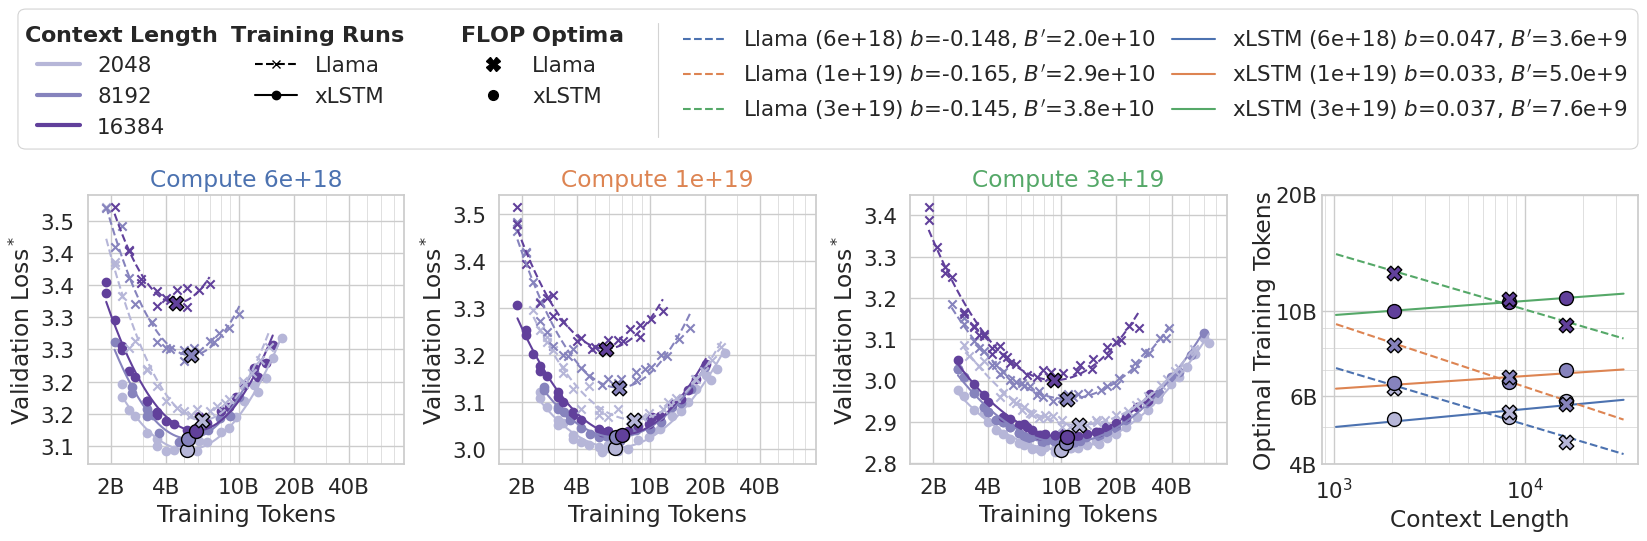

In [23]:
legend_offset = 0.15
frameon = False
with sns.plotting_context("notebook", font_scale=1.4):
    with sns.axes_style(
        "whitegrid",
        rc={
            # "xtick.bottom": True,
            # "ytick.left": True,
            # "xtick.color": "lightgrey",
            # "ytick.color": "lightgrey",
        },
    ):
        fig = get_isoflop_ctx_powerlaw_plot(
            x_col="num_tokens_training",
            y_col="val/.dclm_loss",
            figsize=(20, 3.5),
            legend_kwargs={
                "ncols": 3,
                "loc": "lower left",
                "bbox_to_anchor": (0.09, 0.84 + legend_offset),
                "facecolor": "white",
                "frameon": frameon,
            },
            legend_kwargs_powerlaw_plot={
                "ncols": 2,
                "columnspacing": 0.8,
                "loc": "lower left",
                "bbox_to_anchor": (
                    -2.08,
                    1.05 + legend_offset,  # 0.98 + legend_offset,
                ),  # Adjust the vertical position as needed
                "frameon": frameon,
            },
            gridspec_kw={"wspace": 0.3},
            y_axis_labelpad_powerlaw_plot={
                "num_params": 0.0,
                "num_tokens_training": 0.0,
            },
        )

In [24]:
savefig(fig, "isoflop_ctx_powerlaw_all__tokens")